# Spam Ham EDA
Hello!<br>
This time, I have brought a new project to be done. It is about the binary classification of *SPAM* and *HAM* mails. The dataset is downloaded from [Kaggle](https://www.kaggle.com/veleon/ham-and-spam-dataset).

The dataset consists `2,551` HAM mails ans `501` SPAM mails.<br>
Kindly note that, this project is divided in ***2 notebooks***:
1. Dataset loading and exploration (this book)
2. Machine Learning pipeline, training and evaluation (next book)

— <br>
So, let's get started.

# 

> <b><font face="neuville" style="font-size:50px">DATA <br>LOADING & PREPARATION</font></b>

In [1]:
# Basic imports
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Other file related imports
import os

In [ ]:
# Testing file's content for checking
DATASOURCE = "./DataSource"

with open(DATASOURCE + "/ham/0001.ea7e79d3153e7469e7a9c3e0af6a357e") as file:
    file = file.readlines()

In [3]:
file[: 5]

['From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002\n',
 'Return-Path: <exmh-workers-admin@example.com>\n',
 'Delivered-To: zzzz@localhost.netnoteinc.com\n',
 'Received: from localhost (localhost [127.0.0.1])\n',
 '\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\n']

Okay, now we know that our files can be opened directly as the text files. It has content inside it which also includes the header of the email, subject, metadata and then finally the body. We are interested specially in the mail's body.

We might have to use the Regular Expressions to extract the mail info. But for now, let's go forward.

In [4]:
# SPAM and HAM files names from each folder

ham_files = os.listdir(DATASOURCE + "/ham")[1:]
spam_files = os.listdir(DATASOURCE + "/spam")[1:]

In [5]:
len(ham_files)

2551

In [6]:
len(spam_files)

500

Storing SPAMS

In [7]:
# Storing each mail (raw text) in the `spam_mails` list

spam_mails = []
for fileName in spam_files:
    try:
        with open(DATASOURCE + "/spam/" + fileName) as f:
            data = f.read()
            spam_mails.append(data)
    except:
        with open(DATASOURCE + "/spam/" + fileName, encoding="Latin-1") as f:
            data = f.read()
            spam_mails.append(data)

Storing HAMS

In [8]:
# Storing each mail (raw text) in the `ham_mails` list

ham_mails = []
for fileName in ham_files:
    try:
        with open(DATASOURCE + "/ham/" + fileName) as f:
            data = f.read()
            ham_mails.append(data)
    except:
        with open(DATASOURCE + "/ham/" + fileName, encoding="Latin-1") as f:
            data = f.read()
            ham_mails.append(data)

**Now** that we have the mails from each category, we can start *preprocessing* it to make it in a **usable format.**

We will extract the following information from the emails:
1. `server mail address` from the first line in each mail (header part)
2. `from mail address` this will be somewhere in the middle of the mail (header part)
3. `datetime` when the mail was sent
4. `body` actual text which makes it an *email*

In [9]:
import re

In [10]:
# This will extract the first server mail
pat_FROM = re.compile("from (.*?) ", flags=re.I)

In [11]:
match = pat_FROM.match(spam_mails[6])

In [12]:
match.groups()

('fort@bluemail.dk',)

We get ↑ this from this ↓

In [13]:
spam_mails[6][:100]

'From fort@bluemail.dk  Thu Aug 22 18:28:10 2002\nReturn-Path: <fort@bluemail.dk>\nDelivered-To: zzzz@l'

In [14]:
# This will extract the datetime
pat_DATE = re.compile("from .*?  (.*)", flags=re.I)

In [15]:
match = pat_DATE.match(spam_mails[123])

In [17]:
match.groups()

('Mon Aug 26 19:24:08 2002',)

## 

In [18]:
# Here using the same patterns as we seen above and other 2 for next 2 information listed above.
pat_FROM_FIRST = re.compile("from (.*?) ", flags=re.I)
pat_FROM_MIDDLE = re.compile("From: (.*)", flags=re.I | re.M)
pat_DATE = re.compile("from .*?  (.*)", flags=re.I)
pat_SUBJECT = re.compile("subject: (.*)", flags=re.I | re.M)

In [19]:
# This will iterate through all SPAM mails and get the information
# and stores in ↓ this list

spam_from_and_date = []
for mail in spam_mails:
    try: from_middle_ = pat_FROM_MIDDLE.findall(mail)[0]
    except: from_middle_ = np.nan
        
    try: from_first_ = pat_FROM_FIRST.match(mail).groups()[0]
    except: from_first_ = np.nan
        
    try: datetime_ = pat_DATE.match(mail).groups()[0]
    except: datetime_ = np.nan
        
    try: subject_ = pat_SUBJECT.findall(mail)[0]
    except: subject_ = np.nan

    spam_from_and_date.append((from_first_, from_middle_, datetime_, subject_))

In [20]:
len(spam_from_and_date)

500

In [21]:
# This will iterate through all HAM mails and get the information
# and store in ↓ this list

ham_from_and_date = []
for mail in ham_mails:
    try: from_middle_ = pat_FROM_MIDDLE.findall(mail)[0]
    except: from_middle_ = np.nan
        
    try: from_first_ = pat_FROM_FIRST.match(mail).groups()[0]
    except: from_first_ = np.nan
        
    try: datetime_ = pat_DATE.match(mail).groups()[0]
    except: datetime_ = np.nan
        
    try: subject_ = pat_SUBJECT.findall(mail)[0]
    except: subject_ = np.nan
        
    ham_from_and_date.append((from_first_, from_middle_, datetime_, subject_))

In [22]:
len(ham_from_and_date)

2551

In [24]:
# We don't need these
del ham_files, spam_files

___

Now, we will extract the body. **The real mail.**

In [43]:
# This will be simple. All mails are sepereated with their header
# with 2 \n

ham_body = []
for mail in ham_mails:
    ham_body.append(mail.partition("\n\n")[-1])
    
spam_body = []
for mail in spam_mails:
    spam_body.append(mail.partition("\n\n")[-1])

In [49]:
# Again removing these as we don't need them
del spam_mails, ham_mails

# 

#### So, now we have the body of each messages... why don't we construct a dataframe directly?

Initial DF

In [56]:
spm_tmp = pd.DataFrame(spam_from_and_date)
spm_tmp.columns = ["server_mail", "from_mail", "datetime", "subject"]
print("Shape → ", spm_tmp.shape)
spm_tmp.head()

Shape →  (500, 4)


,server_mail,from_mail,datetime,subject
0,12a1mailbot1@web.de,12a1mailbot1@web.de,Thu Aug 22 13:17:22 2002,Life Insurance - Why Pay More?
1,ilug-admin@linux.ie,"""Slim Down"" <taylor@s3.serveimage.com>",Thu Aug 22 13:27:39 2002,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...
2,sabrina@mx3.1premio.com,"""Slim Down"" <sabrina@mx3.1premio.com>",Thu Aug 22 14:44:07 2002,Guaranteed to lose 10-12 lbs in 30 days ...
3,wsup@playful.com,Account Services <wsup@playful.com>,Thu Aug 22 16:17:00 2002,Re: Fw: User Name & Password to Membership To ...
4,social-admin@linux.ie,"""Slim n Trim"" <yenene@mx2.1premio.com>",Thu Aug 22 16:37:34 2002,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...


In [57]:
hm_tmp = pd.DataFrame(ham_from_and_date)
hm_tmp.columns = ["server_mail", "from_mail", "datetime", "subject"]
print("Shape → ", hm_tmp.shape)
hm_tmp.head()

Shape →  (2551, 4)


,server_mail,from_mail,datetime,subject
0,exmh-workers-admin@redhat.com,Robert Elz <kre@munnari.OZ.AU>,Thu Aug 22 12:36:23 2002,Re: New Sequences Window
1,Steve_Burt@cursor-system.com,Steve Burt <steve.burt@cursor-system.com>,Thu Aug 22 12:46:39 2002,[zzzzteana] RE: Alexander
2,timc@2ubh.com,"""Tim Chapman"" <timc@2ubh.com>",Thu Aug 22 13:52:59 2002,[zzzzteana] Moscow bomber
3,irregulars-admin@tb.tf,Monty Solomon <monty@roscom.com>,Thu Aug 22 14:23:39 2002,[IRR] Klez: The Virus That Won't Die
4,exmh-users-admin@redhat.com,Tony Nugent <tony@linuxworks.com.au>,Thu Aug 22 14:44:07 2002,Re: Insert signature


##### 

Joining messages

In [62]:
# Now we will give them their respective classes

# SPAM
SPAM = pd.concat([spm_tmp, pd.DataFrame(spam_body, columns=["message"])], axis=1)
SPAM["label"] = "spam"

In [63]:
# HAM
HAM = pd.concat([hm_tmp, pd.DataFrame(ham_body, columns=["message"])], axis=1)
HAM["label"] = "ham"

In [66]:
# Final - partially usable format

df = pd.concat([HAM, SPAM])
df

,server_mail,from_mail,datetime,subject,message,label
0,exmh-workers-admin@redhat.com,Robert Elz <kre@munnari.OZ.AU>,Thu Aug 22 12:36:23 2002,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham
1,Steve_Burt@cursor-system.com,Steve Burt <steve.burt@cursor-system.com>,Thu Aug 22 12:46:39 2002,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",ham
2,timc@2ubh.com,"""Tim Chapman"" <timc@2ubh.com>",Thu Aug 22 13:52:59 2002,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,ham
3,irregulars-admin@tb.tf,Monty Solomon <monty@roscom.com>,Thu Aug 22 14:23:39 2002,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,ham
4,exmh-users-admin@redhat.com,Tony Nugent <tony@linuxworks.com.au>,Thu Aug 22 14:44:07 2002,Re: Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",ham
...,...,...,...,...,...,...
495,biz2biz2446@Flashmail.com,biz2biz2446@Flashmail.com,Mon Oct 7 22:42:04 2002,See your Company sales sky rocket. ...,There is NO stumbling on to it! \n\nThe greate...,spam
496,cna@insiq.us,"""IQ - CNA"" <cna@insiq.us>",Tue Oct 8 00:10:39 2002,Hit the Road with CNA,This is a multi-part message in MIME format.\n...,spam
497,bounce2@u-answer.com,Answer.Us@davicom.co.kr,Tue Oct 8 11:02:30 2002,$10 a hour for watching e-mmercials! No joke!,"<html>\n\n<head>\n<meta http-equiv=""Content-La...",spam
498,beautyinfufuxxxmeb13mxy@aol.com,beautyinfufuxxxmeb13mxy@aol.com,Tue Oct 8 11:02:32 2002,Make a Fortune On eBay ...,"<HTML>\n<BODY>\n <tr valign=3D""top""> \n <t...",spam


In [67]:
# Removing non used variables
del spam_body, spam_from_and_date, spm_tmp, ham_body, ham_from_and_date, hm_tmp

In [68]:
# DON'T RUN THIS 
df.to_csv("1st_simple.csv")
# DON'T RUN THIS

In [139]:
df = df.reset_index(drop=True)

In [106]:
# DONT'T RUN THIS
df.from_mail.to_csv("from_mail", index=False)
# DONT'T RUN THIS

# 

#### Now we have our clean dataframe.
*But still we can't directly make our analysis. We still have to clear up the `from_mail` column and convert the `datetime` column in its actual datatype and couple of other tweaks as well.*

###### 


**`1.` Cleaning up the Emails**

In [102]:
idx = df.server_mail.str.contains("^[a-zA-Z0-9+_*?/&=.-]+@[a-zA-Z0-9.-]+$", flags=re.I)

In [104]:
df[idx == False].server_mail.values

array([], dtype=object)

In [116]:
df["server_mail"] = df.server_mail.str.extract("^([a-zA-Z0-9+_*?/&=.-]+@[a-zA-Z0-9.-]+)$", flags=re.I)[0].str.strip()

###### 

We have all valid `server emails`.

In [107]:
idx = df.from_mail.str.contains("[a-zA-Z0-9+_=*.-]+@[a-zA-Z0-9.-]+", flags=re.I)
df[idx == False].from_mail.values

array(['¦n®ø®§@dogma.slashnull.org, §A¤£¬Ý·|«á®¬@dogma.slashnull.org'],
      dtype=object)

We have one buddy... but okay let's extract the proper emails.

In [120]:
df["from_mail"] = df.from_mail.str.extract("([a-zA-Z0-9+_=*.-]+@[a-zA-Z0-9.-]+)", flags=re.I)[0]

And also, just a little clean up...

In [123]:
df["server_mail"] = df["server_mail"].str.lower()

In [125]:
df["from_mail"] = df["from_mail"].str.lower()

<AxesSubplot:>

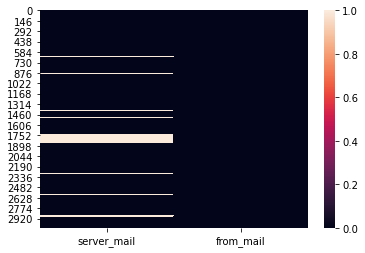

In [141]:
sns.heatmap(df[["server_mail", "from_mail"]].isna())

There are some `NaN` values in the servermail column, which we were unable to find from the message. So that is fine. And from mail looks clean. 

#### Done!

###### 

**`2.` Cleaning dates and setting proper datatype**

In [200]:
dates = pd.to_datetime(df.datetime, format="%a %b %d %H:%M:%S %Y")

In [202]:
df.datetime = dates

In [204]:
df.head()

,server_mail,from_mail,datetime,subject,message,label
0,exmh-workers-admin@redhat.com,kre@munnari.oz.au,2002-08-22 12:36:23,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham
1,steve_burt@cursor-system.com,steve.burt@cursor-system.com,2002-08-22 12:46:39,[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",ham
2,timc@2ubh.com,timc@2ubh.com,2002-08-22 13:52:59,[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,ham
3,irregulars-admin@tb.tf,monty@roscom.com,2002-08-22 14:23:39,[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,ham
4,exmh-users-admin@redhat.com,tony@linuxworks.com.au,2002-08-22 14:44:07,Re: Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",ham


#### Done!

###### 

**`3.` Cleaning subject and making it *just* subject**

In [227]:
df.subject = df.subject.str.strip().str.replace("([\n]|(\s+))", " ")

In [243]:
df.subject = df.subject.str.replace("(Re:|\[.*\])", " ", flags=re.I | re.M)

In [245]:
df.head()

,server_mail,from_mail,datetime,subject,message,label
0,exmh-workers-admin@redhat.com,kre@munnari.oz.au,2002-08-22 12:36:23,New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -05...",ham
1,steve_burt@cursor-system.com,steve.burt@cursor-system.com,2002-08-22 12:46:39,Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",ham
2,timc@2ubh.com,timc@2ubh.com,2002-08-22 13:52:59,Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,ham
3,irregulars-admin@tb.tf,monty@roscom.com,2002-08-22 14:23:39,Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,ham
4,exmh-users-admin@redhat.com,tony@linuxworks.com.au,2002-08-22 14:44:07,Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",ham


#### Done!

###### 

**`4.` Cleaning message and making it *just* message**

The reason behind doing this is that, in many messages we have the `<html>` tags. Which will add no value to our message's being spam or ham. So it is better to remove it.

In [257]:
df.message = df.message.str.strip()
# Removes extra spaces and new lines and adds " " (1st time)
df.message = df.message.str.replace("([\n]|(\s+))", " ")
# Removes html tags and adds ""
df.message = df.message.str.replace("(<(.|\n)*?>|(&nbsp;|&quot;))", "", flags=re.I)
# Removes extra spaces and new lines and adds " " (2nd time)
df.message = df.message.str.replace("([\n]|(\s+))", " ")

Mostly, our message data is cleaned now. So... let's declare it ↓

#### Done!

# 

Finally our DataFrame Looks like this 

In [266]:
df

,server_mail,from_mail,datetime,subject,message,label
0,exmh-workers-admin@redhat.com,kre@munnari.oz.au,2002-08-22 12:36:23,New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 From: Ch...",ham
1,steve_burt@cursor-system.com,steve.burt@cursor-system.com,2002-08-22 12:46:39,Alexander,"Martin A posted: Tassos Papadopoulos, the Gree...",ham
2,timc@2ubh.com,timc@2ubh.com,2002-08-22 13:52:59,Moscow bomber,Man Threatens Explosion In Moscow Thursday Aug...,ham
3,irregulars-admin@tb.tf,monty@roscom.com,2002-08-22 14:23:39,Klez: The Virus That Won't Die,Klez: The Virus That Won't Die Already the mos...,ham
4,exmh-users-admin@redhat.com,tony@linuxworks.com.au,2002-08-22 14:44:07,Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",ham
...,...,...,...,...,...,...
3046,biz2biz2446@flashmail.com,biz2biz2446@flashmail.com,2002-10-07 22:42:04,See your Company sales sky rocket. 4611,There is NO stumbling on to it! The greatest w...,spam
3047,cna@insiq.us,cna@insiq.us,2002-10-08 00:10:39,Hit the Road with CNA,This is a multi-part message in MIME format. -...,spam
3048,bounce2@u-answer.com,answer.us@davicom.co.kr,2002-10-08 11:02:30,$10 a hour for watching e-mmercials! No joke!,Answer-Us Unlist Information This message is ...,spam
3049,beautyinfufuxxxmeb13mxy@aol.com,beautyinfufuxxxmeb13mxy@aol.com,2002-10-08 11:02:32,Make a Fortune On eBay 24772,eBay - #1 Rated Work A= t Home Business Oppor...,spam


How clean and usable!

In [268]:
# DON'T RUN THIS
df.to_csv("dataframe_final.csv", index=False)
# DON'T RUN THIS

# 

> <b><font face="neuville" style="font-size:100px">EDA</font></b>

# 

In [2]:
df = pd.read_csv("./dataframe_final.csv", parse_dates=["datetime"])

### `Q1.` From which domain name we usually get the email?

In [3]:
spm = df[df.label == "spam"]
hm = df[df.label == "ham"]

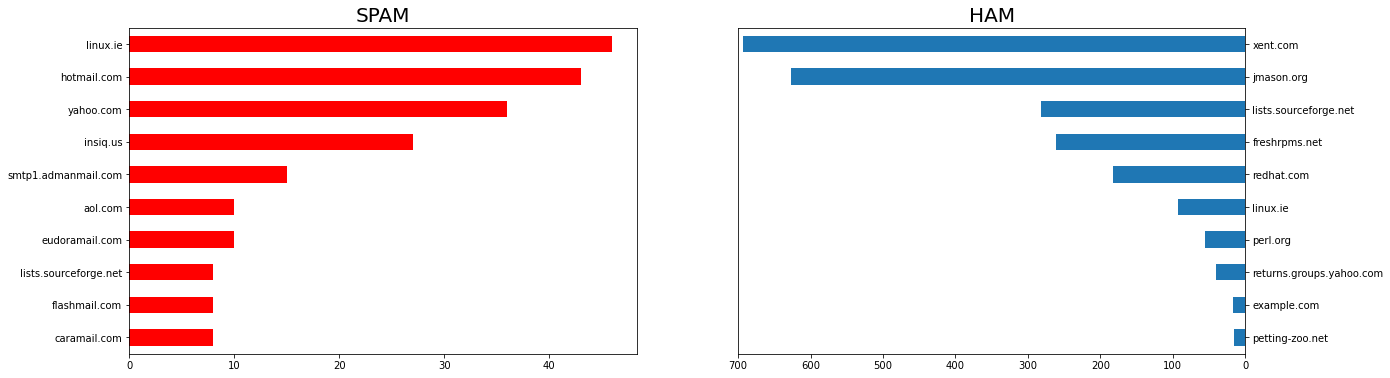

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
spm.server_mail.str.partition("@")[2].value_counts()[:10][::-1].plot.barh(ax=axes[0], color="red")
hm.server_mail.str.partition("@")[2].value_counts()[:10][::-1].plot.barh(ax=axes[1])
axes[1].set_xlim([700, 0])
axes[1].yaxis.set_ticks_position("right")

axes[0].set_title("SPAM", size=20)
axes[1].set_title("HAM", size=20);

This is easily interpretable that, **most of the mails which are SPAMS** come from `linux.ie` server mail domain. Then `hotmail.com` and `yahoo.com` are the most common.

**While,** on the other side - in HAMS, `xemt.com`, `jmason.org` and `sourceforge.net` are the most common. This feature can be a nice decision maker for us to decide whether the mail is spam or ham.

**Indeed**, there are some overlaps like `sourceforge.net`, `linux.ie` etc which are available in both mails. But, still the overlaps are in small amount of domains. See the list below ↓

In [49]:
hm.server_mail.str.partition("@")[2].unique()[np.isin(hm.server_mail.str.partition("@")[2].unique(), 
        spm.server_mail.str.partition("@")[2].unique())]

array(['lists.sourceforge.net', 'linux.ie', 'taint.org', 'crackmice.com',
       'example.com', 'earthlink.net', 'hotmail.com', 'jmason.org'],
      dtype=object)

Just 8 out of many. So, we are gonna keep it as the feature.

###### 

#### **Q1.1** What about the "from mail" domains?

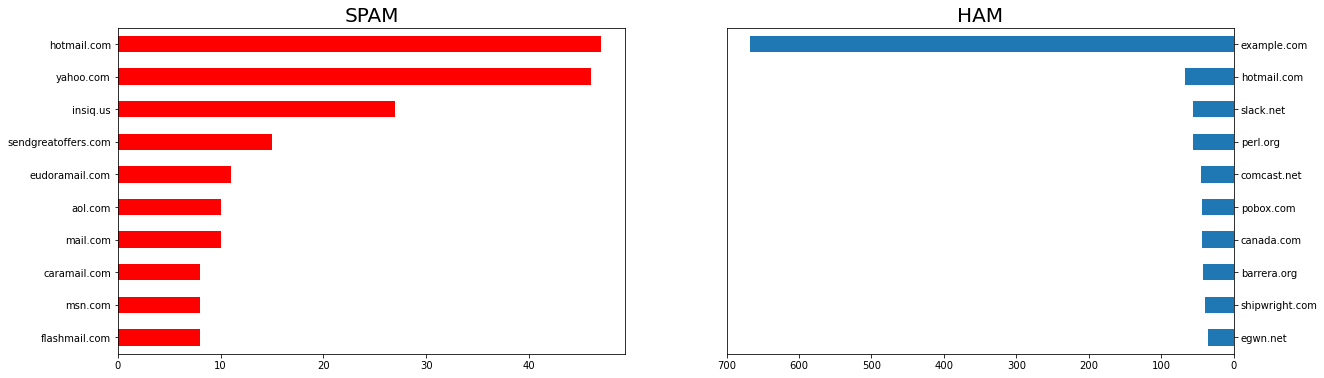

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
spm.from_mail.str.partition("@")[2].value_counts()[:10][::-1].plot.barh(ax=axes[0], color="red")
hm.from_mail.str.partition("@")[2].value_counts()[:10][::-1].plot.barh(ax=axes[1])
axes[1].set_xlim([700, 0])
axes[1].yaxis.set_ticks_position("right")

axes[0].set_title("SPAM", size=20)
axes[1].set_title("HAM", size=20);

Now, again we are looking at some nice feature which can contribute more to the message's being spam or ham. <br>
—<br>
Here, ***for SPAM*** the messages are mostly come from `hotmail.com` (remember the same hotmail was there in servermail domains) and then `yahoo.com` and `insiq.us` are 2nd and 3rd most common.

On the ***HAM*** side, messages are mostly comming from `example.com`. Then there is `hotmail.com`, `slack.net` and the rest follow the similar count as `slack`. Here, hotmail is the overlap which might give use the ambiuity problem in deciding between the SPAM or HAM but still others are different in both types.

In [62]:
hm.from_mail.str.partition("@")[2].unique()[np.isin(hm.from_mail.str.partition("@")[2].unique(), 
        spm.from_mail.str.partition("@")[2].unique())]

array(['yahoo.co.uk', 'hotmail.com', 'linux.ie', 'earthlink.net',
       'yahoo.com', 'wanadoo.fr', 'aol.com', 'mindspring.com',
       'prodigy.net', 'dogma.slashnull.org', 'gmx.net', 'bigfoot.com'],
      dtype=object)

There are only 12 common domains which exist in both types.

###### 

#### **Q1.2** In how many cases (records) we have same domains for `server` and `from` mails?

In [71]:
df[df.server_mail == df.from_mail].groupby("label").size() / df.groupby("label").size() * 100

label
ham      6.703254
spam    69.600000
dtype: float64

Only `6.7 %` mails from all HAM mails are having the same mails. <br>
**AND** <br>
`69 %` mails from all SPAM mails are having the same mails.

That means, same mails are common in SPAMs.

# 

### `Q2.` Which date / time are common for the SPAM mails?

In [160]:
time = pd.concat([hm.datetime.dt.hour.value_counts(), spm.datetime.dt.hour.value_counts()], axis=1)
time.columns = ["ham", "spam"]
time = (time / time.sum(0))

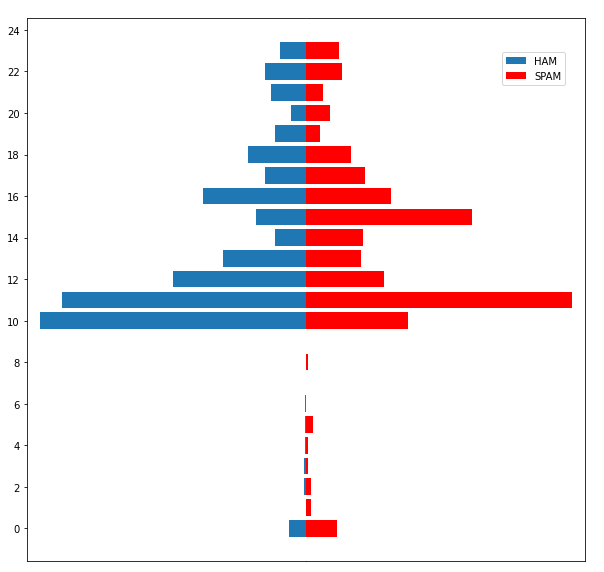

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=None)
axes[0].barh(time.index, time["ham"], label="HAM")
axes[0].invert_xaxis()
axes[0].set_xticks([])
axes[0].set_yticks(range(0, 26, 2))
axes[0].spines["right"].set_visible(False)

axes[1].barh(time.index, time["spam"], color="red", label="SPAM")
axes[1].set_yticks([])
axes[1].set_xticks([])
axes[1].spines["left"].set_visible(False)

handles_0, labels_0 = axes[0].get_legend_handles_labels()
handles_1, labels_1 = axes[1].get_legend_handles_labels()

handels = handles_0 + handles_1
labels = labels_0 + labels_1
fig.legend(handels, labels, loc=(0.83, 0.85));

**Here**, it the mail sending hour doesn't follow some kind of trend... most of the time, we can see that both mails are being sent in the same time span of the day. 

But, for SPAMs, **15** hour at noon is more common and at the same time **HAMs** are send in the low amount. And at **10** in the morning, HAMs are sent the most than the SPAMs.

— ***NOTE***: The vizual is normalized so that we can compare both type of mails. Otherwise the imbalanced frequency would have resulted in some misleading conclusions.

# 

### `Q3.` What is the common length of subject for both types of mails?

In [182]:
subject_len = pd.concat([df.label, df.subject.str.len()], axis=1)

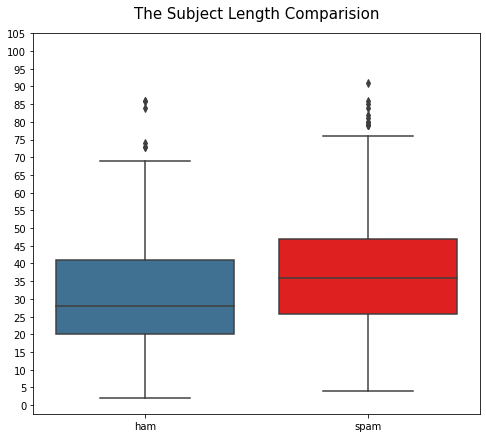

In [213]:
plt.figure(figsize=(8, 7))
sns.boxplot(x="label", y="subject", data=subject_len, palette=["#3274a1", "red"])
plt.ylabel(""); plt.xlabel("")
plt.title("The Subject Length Comparision", size=15, pad=15)
plt.yticks(range(0, 110, 5));

**Here**, it seems to be simple that, spam messages' subject length is slightly more than the HAMs'. And they tend to be more than that becasue teh outliers too have larger value.

When the HAMs are tend to have lower length in their subjects. And there are just a few outliers which are not too extreme.

###### 

### `Q4.` What is the length distribution for both types of mails?

In [214]:
message_len = pd.concat([df.label, df.message.str.len()], axis=1)

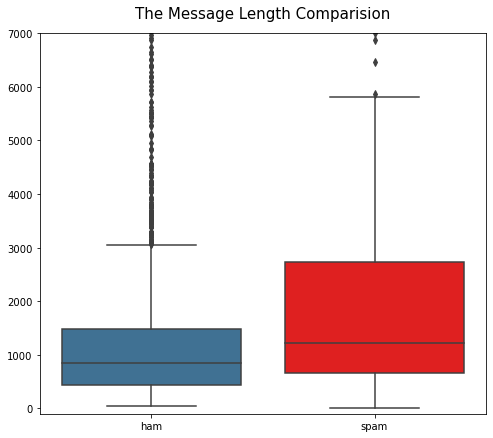

In [235]:
plt.figure(figsize=(8, 7))
sns.boxplot(x="label", y="message", data=message_len, palette=["#3274a1", "red"])
plt.ylabel(""); plt.xlabel("")
plt.title("The Message Length Comparision", size=15, pad=15)
plt.ylim([-100, 7000]);

Here, the message length is soo much squewed. And there is not any concrete insight that can say a message which is usually large is this... you know. Here we can see a lot of outliers.

So, I think I should avoid taking the "length" as the feature to decide the message's mode.

# 

### `Q5.` What topics are usually discussed in each type of messages?


Now, for this to be done our normal word extraction technique will not help. We need to use something better. Here, I could use some pretrained tools from Google, Amazon etc. to get the theme of the message. (Remember: Here our aim is to get the *theme*, not the *tone* of the message)

So, after too much searching I found [this method](https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea) to be a nice fit. The following code replicates just that. 

###### 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

n_gram_range = (1, 1)
stop_words = "english"
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [21]:
th = 1
def get_keyword(msg):
    global th
    if th % 10 == 0:
        print(th)
    th += 1
    
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([msg])
        candidates = count.get_feature_names()

        doc_embedding = model.encode([msg])
        candidate_embeddings = model.encode(candidates)

        top_n = 5
        distances = cosine_similarity(doc_embedding, candidate_embeddings)
        keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
        return keywords[0]
    
    except:
        return "NaN"

In [ ]:
keywords = df.message.apply(get_keyword)

In [25]:
df["topic"] = keywords

Now, frankly the result is not awsome. But if it were we would have done some vizual like this ↓

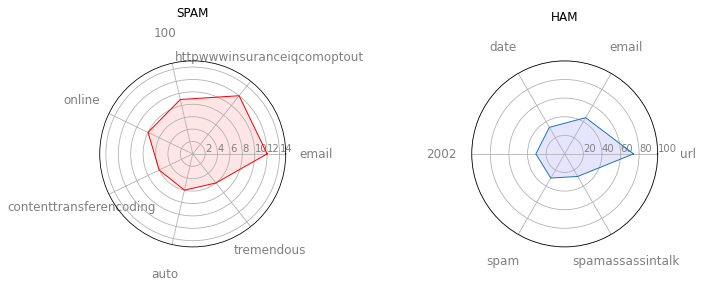

In [80]:
topics = df[df.label == "spam"].topic.value_counts()[:7].index
values = df[df.label == "spam"].topic.value_counts()[:7].values.tolist()
N = len(values)
values += values[:1]
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig = plt.figure(facecolor="white", figsize=(10, 15))
ax = plt.subplot(121, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], topics, color='grey', size=12)
plt.tick_params(axis='x', pad=20)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
plt.ylim(0,15)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color="r")

# Fill area
ax.fill(angles, values, 'r', alpha=0.1)
ax.set_title("SPAM", pad=10)



topics = df[df.label == "ham"].topic.value_counts()[:6].index
values = df[df.label == "ham"].topic.value_counts()[:6].values.tolist()
N = len(values)
values += values[:1]
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(122, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], topics, color='grey', size=12)
plt.tick_params(axis='x', pad=20)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=10)
plt.ylim(0, 100)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
ax.set_title("HAM", pad=20)


plt.subplots_adjust(wspace=1)

Cool! Here, we can easily see how the spam messages are talking about some topic and how the hams. 

###### 

### `Q6.` Most frequent words in Spam


Now, here - we are directly trying to work on the messages. So we need to remove the *stopwords*, *punctuation* and also have to do *stemming*.

###### 

`SPAM`

In [54]:
# First looking at the messages WITHOUT any filteration.
all_messages = " ".join(spm.message).lower()

In [55]:
len(all_messages)

1897716

In [51]:
vocab = list(set(all_messages.lower().split()))

In [52]:
len(vocab)

29012

We have 29K unique words. (Of course they are not *words* as we call it. They are different. But for now let's say we have 29K unique words)

In [57]:
words = all_messages.split()

In [59]:
pd.value_counts(words)[:20]

the     5804
to      4936
and     3684
of      3597
you     3039
a       2371
in      2083
for     2054
your    1889
this    1861
is      1629
i       1162
that    1104
=20     1033
with     998
or       981
on       938
are      935
be       904
not      839
dtype: int64

We must have to remove the punctuation and the stop words. <br>
But, before that let's see for HAMS.

`HAMS`

In [60]:
# First looking at the messages WITHOUT any filteration.
all_messages = " ".join(hm.message)

In [61]:
len(all_messages)

3554307

In [62]:
vocab = list(set(all_messages.lower().split()))

In [63]:
len(vocab)

55183

More than SPAMS huh?

In [64]:
words = all_messages.split()

In [67]:
pd.value_counts(words)[:30]

the     20884
>       19202
to      13053
of      10637
and     10359
a       10072
in       6630
is       6234
that     5519
I        5401
for      4560
it       3739
on       3315
with     3005
be       2788
you      2654
have     2631
are      2436
this     2372
as       2319
from     2153
The      2139
not      2124
at       2020
was      1954
or       1908
but      1830
an       1708
by       1627
--       1569
dtype: int64

We **have to** do some preprocessing first!

## 

**Preprocessing - Stopwords, Punctuation removal and Stamming, Lemmitization**

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [7]:
# DON't RUN THIS
import nltk
nltk.download("wordnet")
# DON't RUN THIS

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GIGABYTE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stopwords = stopwords.words("english")
puncs = string.punctuation
lemma = WordNetLemmatizer()

In [46]:
[lemma.lemmatize(word, pos="n") for word in ["Fly", "Flew", "Flown", "Flied", "done", "did", "am", "worked", "trying", "Aayush"]]

['Fly',
 'Flew',
 'Flown',
 'Flied',
 'done',
 'did',
 'am',
 'worked',
 'trying',
 'Aayush']

In [5]:
import re

In [10]:
# These are...
idx = [9, 10, 11, 12, 22, 27, 41, 145, 147 ,149 , 151, 153, 155, 157, 159, 162, 164, 166, 168, 170, 172, 174, 176, 178]

In [11]:
tobeadded = re.sub("'", "", " ".join(np.array(stopwords)[idx])).split()
tobeadded = tobeadded + ["u", "r", "dont"]
stopwords = stopwords + tobeadded

In [12]:
replacer = re.compile(r'[!"#$%&\'()*+,-./:;<=>?@\[\\\]^_`\{|\}~"]')
lemma = WordNetLemmatizer()

def remove_unrelated(msg):
    # Make it low
    msg = msg.lower()
    
    # Removing puncs
    msg = replacer.sub("", msg)
    
    # Removing stops
    msg = [word for word in msg.split() if word not in stopwords]
    
    # Lemmitizing
    msg = [lemma.lemmatize(word, pos="v") for word in msg]
    
    # Joining
    msg = " ".join(msg)
    return msg

In [13]:
processed = df.message.apply(remove_unrelated)
df.message = processed

In [14]:
spm = df[df.label == "spam"]
hm = df[df.label == "ham"]

In [15]:
all_messages = " ".join(spm.message)
words = all_messages.split()
spm_words = pd.value_counts(words)

In [16]:
all_messages = " ".join(hm.message)
words = all_messages.split()
hm_words = pd.value_counts(words)

In [17]:
hm_words = hm_words[~hm_words.index.isin(["2002", "date", "1", "2"])]

## 

In [18]:
import squarify

In [19]:
from matplotlib import cm
color = cm.seismic_r(np.linspace(.35, .6, 100))

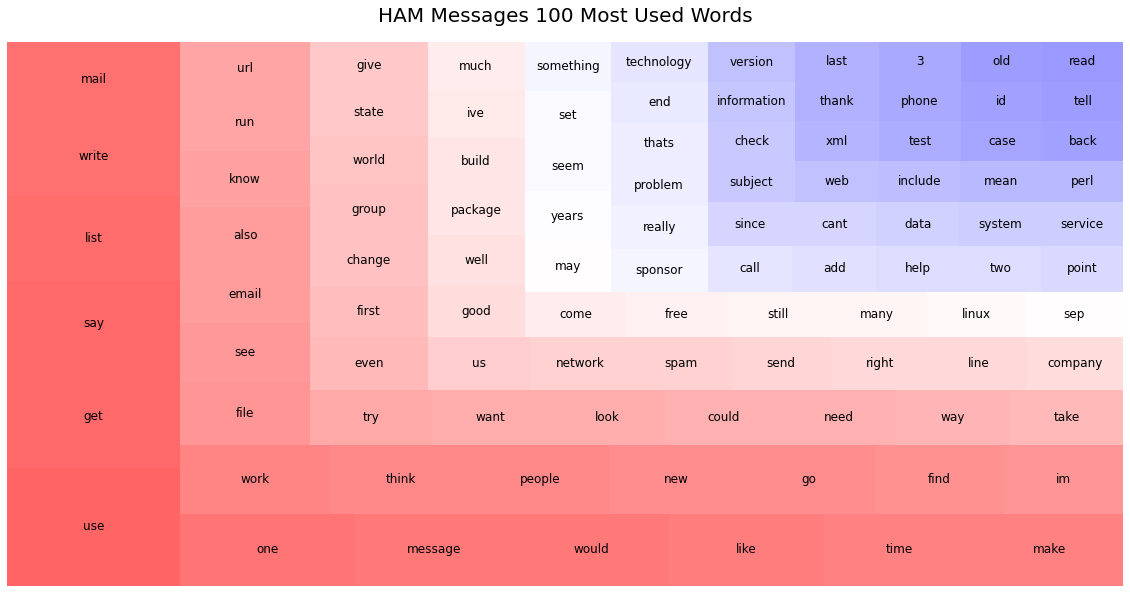

In [230]:
plt.figure(figsize=(20, 10))
sizes=hm_words.values[:100]
label=hm_words.index[:100]
squarify.plot(sizes=sizes, label=label, alpha=1, color=color, text_kwargs={"size":12})
plt.axis("off")
plt.title("HAM Messages 100 Most Used Words", pad=20, size=20)
plt.show()

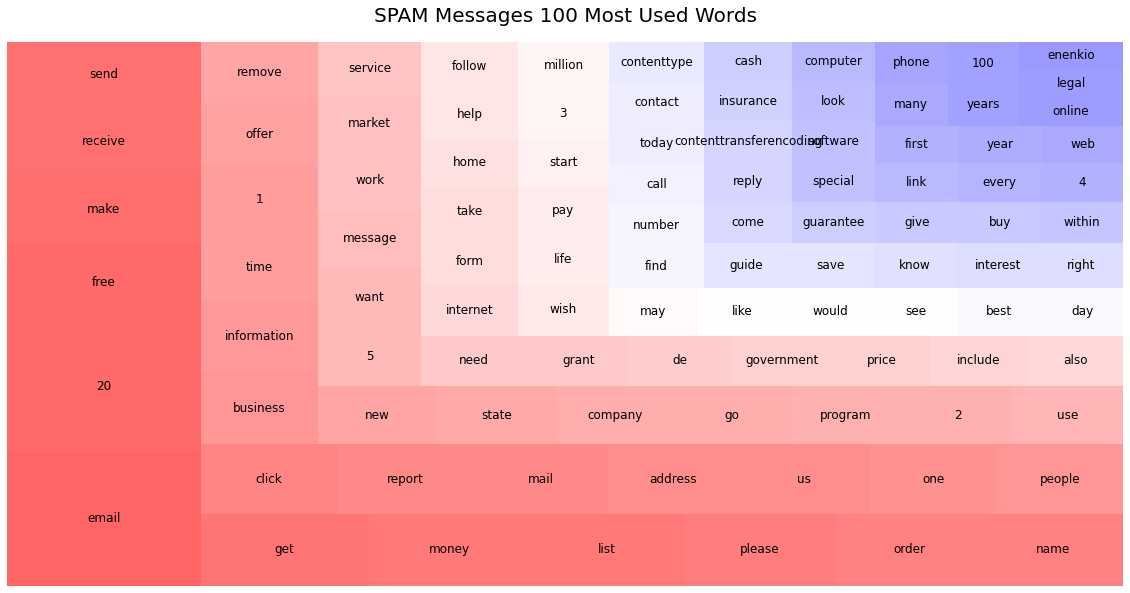

In [231]:
plt.figure(figsize=(20, 10))
sizes=spm_words.values[:100]
label=spm_words.index[:100]
squarify.plot(sizes=sizes, label=label, alpha=1, color=color, text_kwargs={"size":12})
plt.axis("off")
plt.title("SPAM Messages 100 Most Used Words", pad=20, size=20)
plt.show()

Look at the difference, the small squares (bluish) are those which are not repeated that much, but those in big squares (redish) are those which get used most frequently.

- We can see some good difference between both types of mails.  
- One **mail** word is occuring in both types of messages and is for notable amount of time
- We can also see **send**, **receice**, **free** keywords in the spam messages which well, make them spams
- In hams, **list**, **say**, **get** are the other most used word which kind of we use in our daily life

# 

### `Q7.` If the message length is # then the topic is usually ___ (overall)


In [2]:
df = pd.read_csv("./cleaned_regexed_topicwise.csv", parse_dates=["datetime"])

In [3]:
spm = df[df.label == "spam"]
hm = df[df.label == "ham"]

`SPAM`

In [24]:
spm_length = spm.message.apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [49]:
spm["class"] = pd.cut(spm_length, bins=30, precision=0)

<ipython-input-49-64307765a4fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spm["class"] = pd.cut(spm_length, bins=30, precision=0)


In [50]:
spm.groupby("class")["topic"].apply(lambda topics: topics.value_counts()[:2])

class                                                                                        
(-7.0, 217.0]     email                                                                          12
                  100                                                                             9
(217.0, 434.0]    httpwwwinsuranceiqcomoptout                                                     6
                  investors                                                                       5
(434.0, 651.0]    stjepanovica                                                                    2
                  indiaeconomics                                                                  1
(651.0, 869.0]    mastercard                                                                      2
                  2pa0z29hg9ietzu6ccgpcuzzaaral33jcqzkbzmxkntftinmzs6zl641vittalpn6cwvg5fy        1
(869.0, 1086.0]   millionaire                                                                     3
      

In [ ]:
###### 

`HAM`

In [35]:
hm_length = hm.message.apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [45]:
hm["class"] = pd.cut(hm_length, bins=50, precision=0)

<ipython-input-45-cea29c362388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm["class"] = pd.cut(hm_length, bins=50, precision=0)


In [46]:
hm.groupby("class")["topic"].apply(lambda topics: topics.value_counts()[:2])

class                                                                            
(-7.0, 152.0]     url                                                                74
                  email                                                              40
(152.0, 303.0]    spam                                                                7
                  httpthinkgeekcomsf                                                  6
(303.0, 454.0]    yeasterday                                                          2
                  ceaseanddesist                                                      2
(454.0, 605.0]    cybercrime                                                          2
                  jakobsi4mailinformatikrwthaachende                                  1
(605.0, 756.0]    sister                                                              2
                  online                                                              2
(756.0, 907.0]    housekeeper         

Here, we can see the topics which appear much often when there are that many words in the message. Since, our dataset is't much large and there aren't enough messages to extract the data the above findings won't give much insights.


# 

### `Q8.` How many nouns are used in each type of messages?


In [51]:
import nltk

In [57]:
# DON'T RUN THIS
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# DON'T RUN THIS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [71]:
from collections import Counter

In [83]:
def count_nouns(msg):
    try:
        tokens = nltk.word_tokenize(msg)
        text = nltk.Text(tokens)
        tags = nltk.pos_tag(msg)
        return Counter(tag for word, tag in tags).get("NN", 0)
    except:
        return 0

In [ ]:
n_nouns = df.message.apply(count_nouns)

In [85]:
df["n_nouns"] = n_nouns

In [86]:
df.to_csv("BEST.csv", index=False)

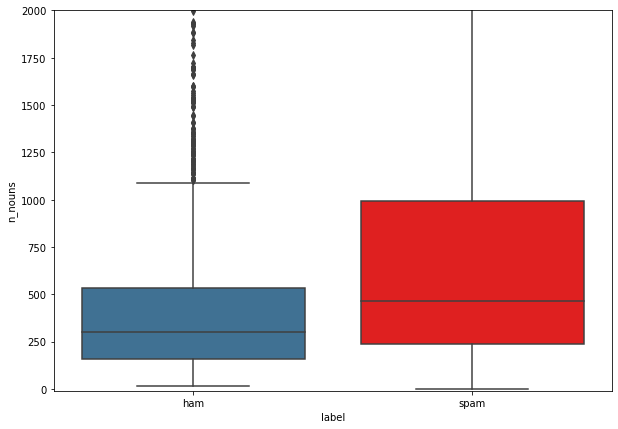

In [103]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="label", y="n_nouns", data=df, palette=["#3274a1", "red"])
plt.ylim([-10, 2000]);

We are having tooo much outliers here, but relatively our spam messages are tend to include more nouns in the messages than the hams. 

# 

# That's it!
I know this project might deserve more than this, but hey I am eager to know how our model performs. So, in the next book we will implement the ML part.

See you there, <br>
Aayush ∞ Shah